In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
is_working_with_easy_dataset = True

In [3]:
def get_text(html_text):
    soup = BeautifulSoup(html_text)
    return soup.get_text()

def embed(model, txt):
    txt = [txt]
    embeddings = model.encode(txt)
    for sentence, embedding in zip(txt, embeddings):
        return embedding

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

## Loading in Dataset for Vectorization

In [120]:
if is_working_with_easy_dataset:
    input_train_filename = "jd_easy_train.csv"
    input_test_filename = "jd_easy_test.csv"
else:
    input_train_filename = "jd_difficult_train.csv"
    input_test_filename = "jd_difficult_test.csv"

jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [121]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [122]:
embedding_vectors_train = list(
    pd.Series.tolist(jd_train.description.apply(lambda x: embed(model, get_text(x)))))
embedding_train = pd.concat(
    [jd_train.category, pd.DataFrame(embedding_vectors_train)], axis=1)
embedding_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.007818,0.015209,-0.032915,-0.040774,-0.075819,-0.122257,0.003905,0.105021,-0.081435,...,0.036517,0.067738,0.017234,-0.021146,-0.005016,0.052575,0.016892,0.011725,0.031423,0.008097
1,arts,-0.039281,-0.037813,-0.002049,-0.079996,-0.009300,0.014721,0.028362,-0.028484,-0.047296,...,0.061370,0.030016,-0.020944,0.025066,-0.054447,0.042434,-0.016480,-0.065129,-0.121761,0.036031
2,hr,-0.099071,0.067754,-0.018720,0.065808,-0.019722,-0.006825,-0.010283,0.001540,-0.087364,...,0.081999,0.114448,0.022363,-0.051149,0.002981,0.086356,0.092362,-0.042364,-0.033669,0.060429
3,arts,-0.000244,-0.010329,0.005088,0.019951,0.031961,-0.004796,-0.056017,0.008362,-0.058531,...,0.018572,0.015595,0.026521,0.006298,-0.024210,0.076719,-0.001265,-0.029895,-0.037964,0.052187
4,arts,0.037742,-0.058576,0.017413,-0.007462,-0.010717,-0.022504,-0.016252,0.022974,-0.052209,...,0.015944,0.056351,0.060758,0.049852,-0.018264,0.075948,0.001910,-0.011242,-0.045209,0.029765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,-0.092087,0.031149,-0.008015,-0.022320,-0.046425,-0.083988,0.008692,0.036745,-0.129390,...,0.008609,0.064561,-0.016291,-0.005272,-0.021538,0.051470,0.078117,-0.018555,-0.036695,-0.013603
3178,sales,-0.078644,0.031273,0.041027,-0.058212,-0.068799,0.024472,0.047536,0.047297,-0.061370,...,-0.022879,0.019196,0.019246,-0.004855,0.016442,0.089635,0.074209,-0.086454,-0.098238,0.072741
3179,arts,-0.101251,0.041866,-0.005444,-0.011291,-0.032258,-0.016939,0.026778,0.046210,-0.083376,...,0.004621,0.021080,0.026186,0.022296,-0.041951,0.082195,0.048774,-0.097376,-0.085289,0.013674
3180,hr,-0.051157,0.022184,0.029747,0.018414,-0.007712,-0.003600,0.016207,0.049001,-0.018576,...,0.000053,0.008966,-0.015656,-0.005649,-0.080121,0.053882,0.070258,-0.079552,-0.019765,0.002172


In [123]:
embedding_vectors_test = list(
    pd.Series.tolist(jd_test.description.apply(lambda x: embed(model, get_text(x)))))
embedding_test = pd.concat(
    [jd_test.category, pd.DataFrame(embedding_vectors_test)], axis=1)
embedding_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.113818,0.008952,-0.004451,0.003387,0.041243,-0.074476,0.027237,0.074545,-0.080968,...,0.016368,0.115178,0.065218,-0.074784,0.057262,0.082102,0.059299,-0.031293,0.007032,0.071702
1,sales,-0.019982,-0.019572,-0.043766,0.038807,-0.021798,-0.003498,-0.008579,-0.007094,0.017747,...,0.023369,-0.032173,-0.008954,-0.028408,-0.041258,-0.016728,0.078255,-0.043575,0.043920,-0.008786
2,sales,-0.061115,0.037327,-0.035323,0.007244,-0.014231,0.054096,0.095702,0.017702,-0.064049,...,0.024937,0.007117,0.029717,0.036748,-0.017619,0.084793,0.017758,-0.004776,-0.067190,0.031323
3,sales,-0.110860,0.012782,-0.030584,-0.077872,-0.102458,0.048481,0.027282,0.055432,-0.007119,...,-0.057282,0.060048,0.012040,0.056503,-0.008248,0.102686,-0.004278,-0.015446,-0.055078,0.049244
4,arts,-0.044880,0.017243,0.052809,-0.012010,0.038006,-0.025841,0.002447,0.005194,-0.023129,...,0.014638,0.062186,0.076078,-0.041519,-0.023763,0.048595,0.060352,-0.011345,-0.059987,0.039882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,-0.131392,-0.029033,-0.082744,-0.039305,-0.028481,-0.063193,-0.057688,0.128488,-0.072210,...,-0.023796,0.086397,-0.071659,-0.031082,-0.003570,0.047519,0.033251,-0.166673,-0.007538,-0.031994
792,software+engineer,-0.043274,-0.032123,0.041134,-0.017565,0.032743,-0.072493,0.013035,-0.040865,0.005068,...,0.003571,0.061880,0.018539,-0.087545,0.026615,0.099625,0.018813,-0.029922,0.014897,-0.003446
793,software+engineer,-0.006800,-0.087576,-0.029101,-0.043830,-0.068833,-0.016611,0.032965,0.086794,-0.112048,...,0.093700,0.060009,-0.031102,0.073509,0.054705,0.061826,0.028178,-0.001595,-0.046012,-0.033700
794,hr,-0.128770,0.043694,-0.002058,0.047944,-0.053523,0.042907,0.058572,-0.007716,-0.058442,...,-0.018871,0.036778,-0.042918,-0.002689,-0.052095,0.123027,0.064848,-0.024640,0.003905,0.014744


In [124]:
if is_working_with_easy_dataset:
    output_train_filename = "embedding_easy_train.csv"
    output_test_filename = "embedding_easy_test.csv"
else:
    output_train_filename = "embedding_difficult_train.csv"
    output_test_filename = "embedding_difficult_test.csv"

embedding_train.to_csv(output_train_filename, index=False)
embedding_test.to_csv(output_test_filename, index=False)

## RNN building (bag of words)

### Easy Dataset

In [7]:
is_working_with_easy_dataset = True

In [8]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [9]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [10]:
jd_train

,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.222604,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.281375,0.0,0.0,0.000000,0.000000,0.000000,0.198413,0.118790,0.000000
1,arts,0.0,0.0,0.0,0.102594,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.092776,0.000000,0.000000,0.000000,0.000000
2,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.069475,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.086890,0.122337
3,arts,0.0,0.0,0.0,0.393433,0.0,0.0,0.113493,0.000000,0.268595,...,0.0,0.000000,0.0,0.0,0.000000,0.071156,0.000000,0.000000,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.206635,0.0,0.0,0.149018,0.000000,0.088168,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.118194,0.000000,0.000000,0.077626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,0.0,0.0,0.0,0.161678,0.0,0.0,0.000000,0.000000,0.045990,...,0.0,0.000000,0.0,0.0,0.000000,0.048735,0.184958,0.048036,0.230073,0.000000
3178,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.138805,0.096160,0.243296,0.000000,0.000000,0.000000
3179,arts,0.0,0.0,0.0,0.661753,0.0,0.0,0.286341,0.000000,0.056472,...,0.0,0.000000,0.0,0.0,0.000000,0.059842,0.000000,0.000000,0.070627,0.000000
3180,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.209857,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.195725


In [11]:
jd_test

,category,Human,’,Development,design,Work,Computer,creative,account,communication,...,Requirements,technical,Excellent,duty,market,knowledge,technology,business,application,matter
0,software+engineer,0.0,0.0,0.0,0.504831,0.0,0.0,0.000000,0.000000,0.089474,...,0.0,0.000000,0.0,0.000000,0.000000,0.370597,0.000000,0.000000,0.000000,0.000000
1,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.284994,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.164661,0.000000,0.136495
2,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.071549,0.000000,0.083948,...,0.0,0.000000,0.0,0.000000,0.199817,0.043464,0.000000,0.089533,0.000000,0.000000
3,sales,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.239945,0.129985,...,0.0,0.000000,0.0,0.210654,0.206265,0.000000,0.000000,0.277267,0.000000,0.000000
4,arts,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.366191,...,0.0,0.000000,0.0,0.000000,0.000000,0.068943,0.389033,0.071010,0.000000,0.058863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,0.0,0.0,0.0,0.096486,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.088538,0.111023,0.000000,0.000000,0.000000
792,software+engineer,0.0,0.0,0.0,0.274670,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.210175,0.0,0.000000,0.077249,0.050409,0.252843,0.259600,0.116410,0.000000
793,software+engineer,0.0,0.0,0.0,0.038540,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.122505,0.000000
794,hr,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.180604,0.000000,0.000000,0.000000,0.000000,0.133245,0.000000


In [12]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [13]:
jd_test_y.value_counts()

category         
software+engineer    220
arts                 198
sales                197
hr                   181
dtype: int64

In [14]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [15]:
enc.categories_

[array(['arts', 'hr', 'sales', 'software+engineer'], dtype=object)]

In [16]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(116, 1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [20]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [22]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50
100/100 [==============================] - 8s 81ms/step - loss: 1.3802 - accuracy: 0.4026 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - auc_1: 0.6134 - val_loss: 1.3785 - val_accuracy: 0.3744 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_auc_1: 0.6284
Epoch 2/50
100/100 [==============================] - 7s 75ms/step - loss: 1.3743 - accuracy: 0.3982 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - auc_1: 0.6385 - val_loss: 1.3694 - val_accuracy: 0.4121 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_auc_1: 0.6650
Epoch 3/50
100/100 [==============================] - 8s 76ms/step - loss: 1.3587 - accuracy: 0.4079 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - auc_1: 0.6621 - val_loss: 1.3391 - val_accuracy: 0.3920 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_auc_1: 0.6667
Epoch 4/50
100/100 [==============================] - 8s 79ms/step - loss: 1.2913 - accuracy: 0.4142 - recall_1: 0.0409 - precision_1: 0.6842 - a

(0.0, 1.40383722782135)

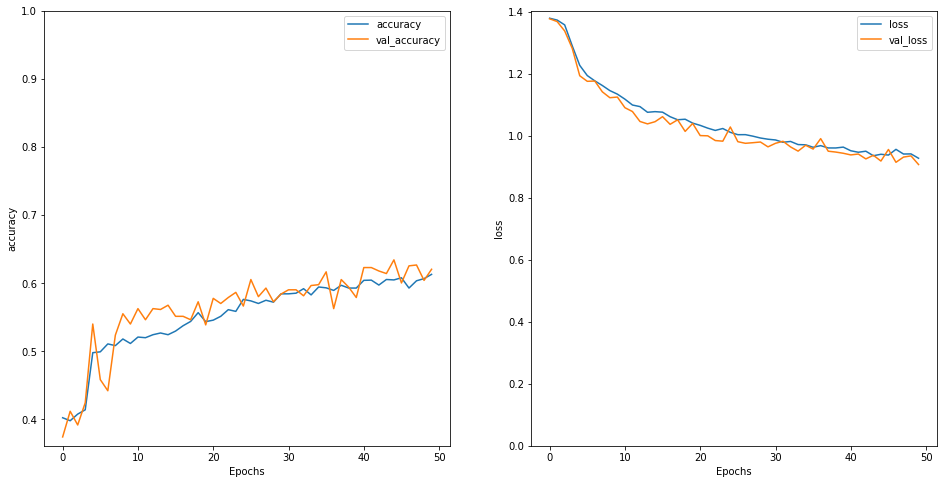

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [24]:
model.save("tf_models/rnn_easy_bag.h5")

### Hard Dataset (bag of words)

In [26]:
is_working_with_easy_dataset = False

In [27]:
if is_working_with_easy_dataset:
    input_train_filename = "bag_easy_train.csv"
    input_test_filename = "bag_easy_test.csv"
else:
    input_train_filename = "bag_difficult_train.csv"
    input_test_filename = "bag_difficult_test.csv"

In [28]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [29]:
jd_train

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.143276,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.345453,0.000000,0.0,0.323940
1,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.061751,0.0,...,0.0,0.082574,0.0,0.000000,0.0,0.057996,0.000000,0.125683,0.0,0.511923
2,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.290684,0.499494,0.0,...,0.0,0.000000,0.0,0.203606,0.0,0.000000,0.100361,0.000000,0.0,0.062741
3,ui+ux,0.120286,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.160089,0.0,0.073200,0.0,0.112439,0.000000,0.000000,0.0,0.225563
4,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.115759,0.0,0.105860,0.0,0.040652,0.000000,0.000000,0.0,0.097861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,software+engineer,0.000000,0.0,0.0,0.000000,0.0,0.0,0.095572,0.054742,0.0,...,0.0,0.109803,0.0,0.066942,0.0,0.179947,0.164985,0.111417,0.0,0.123768
3176,cyber+security,0.000000,0.0,0.0,0.140165,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.210418,0.0,0.000000,0.0,0.221681,0.094849,0.000000,0.0,0.177885
3177,ui+ux,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.422655,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.509533,0.107530,0.0,0.238901
3178,data+analyst,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.026570,0.0,...,0.0,0.071060,0.0,0.064984,0.0,0.124773,0.032032,0.567827,0.0,0.060074


In [30]:
jd_test

,category,assessment,Management,Work,cyber,ÊÊ,Data,control,design,Experience,...,Technology,role,Java,process,Strong,skill,software,business,Ability,experience
0,data+analyst,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.248572,0.000000,0.523485,0.0,0.064633
1,cyber+security,0.0,0.0,0.0,0.175017,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.151252
2,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102496,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.038436
3,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.147327,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.141651,0.044691,0.335602,0.0,0.110494
4,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.102945,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.148468,0.000000,0.000000,0.0,0.115812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,software+engineer,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.044197,0.0,...,0.0,0.059146,0.0,0.055503,0.0,0.000000,0.107255,0.000000,0.0,0.099442
791,cyber+security,0.0,0.0,0.0,0.000000,0.0,0.0,0.087995,0.050226,0.0,...,0.0,0.000000,0.0,0.126149,0.0,0.048291,0.000000,0.152549,0.0,0.113008
792,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.602373,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.231666,0.000000,0.000000,0.0,0.180710
793,ui+ux,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.388837,0.0,...,0.0,0.000000,0.0,0.162769,0.0,0.000000,0.314537,0.000000,0.0,0.194417


In [31]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [32]:
jd_test_y.value_counts()

category         
cyber+security       212
software+engineer    211
ui+ux                200
data+analyst         172
dtype: int64

In [33]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [34]:
enc.categories_

[array(['cyber+security', 'data+analyst', 'software+engineer', 'ui+ux'],
       dtype=object)]

In [35]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(100, 1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [37]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [38]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50


2023-04-03 23:19:16.953098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:17.220464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:17.220520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:17.723007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:17.738280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3847 - accuracy: 0.3755 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - auc_2: 0.5509

2023-04-03 23:19:26.230398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:26.348853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:19:26.348870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 13s 100ms/step - loss: 1.3847 - accuracy: 0.3755 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - auc_2: 0.5509 - val_loss: 1.3841 - val_accuracy: 0.3358 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_auc_2: 0.5701
Epoch 2/50
100/100 [==============================] - 7s 71ms/step - loss: 1.3829 - accuracy: 0.4006 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - auc_2: 0.6218 - val_loss: 1.3822 - val_accuracy: 0.3660 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_auc_2: 0.6114
Epoch 3/50
100/100 [==============================] - 7s 70ms/step - loss: 1.3801 - accuracy: 0.4069 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - auc_2: 0.6534 - val_loss: 1.3795 - val_accuracy: 0.3585 - val_recall_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_auc_2: 0.6437
Epoch 4/50
100/100 [==============================] - 7s 74ms/step - loss: 1.3764 - accuracy: 0.4314 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - au

(0.0, 1.4199752688407898)

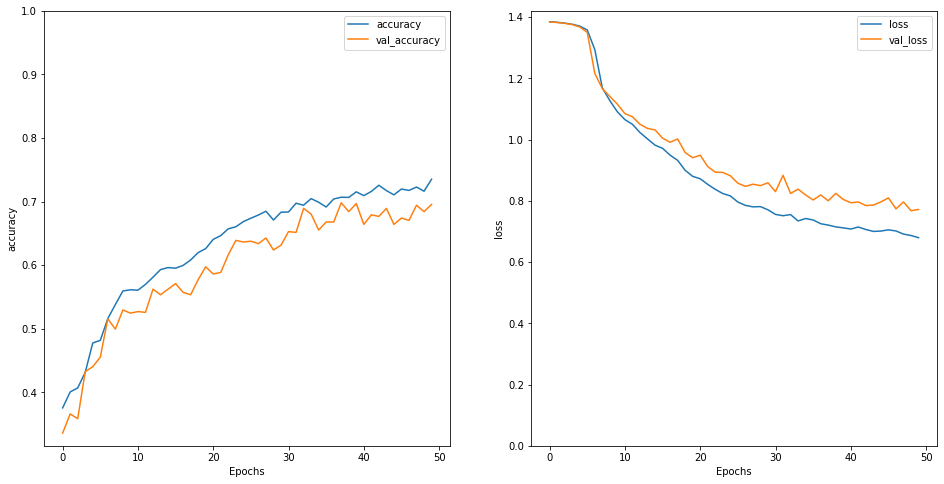

In [39]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [40]:
model.save("tf_models/rnn_hard_bag.h5")

## Start of RNN building (embeds)

We will first create an RNN model on the easy dataset, analyse the results, and then create the RNN model on the hard dataset

### Easy Dataset (Distinct Job Categories)

In [41]:
is_working_with_easy_dataset = True

In [42]:
if is_working_with_easy_dataset:
    input_train_filename = "embedding_easy_train.csv"
    input_test_filename = "embedding_easy_test.csv"
else:
    input_train_filename = "embedding_difficult_train.csv"
    input_test_filename = "embedding_difficult_test.csv"

In [43]:
jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [44]:
jd_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.007818,0.015209,-0.032915,-0.040774,-0.075819,-0.122257,0.003905,0.105021,-0.081435,...,0.036517,0.067738,0.017234,-0.021146,-0.005016,0.052575,0.016892,0.011725,0.031423,0.008097
1,arts,-0.039281,-0.037813,-0.002049,-0.079996,-0.009300,0.014721,0.028362,-0.028484,-0.047296,...,0.061370,0.030016,-0.020944,0.025066,-0.054447,0.042434,-0.016480,-0.065129,-0.121761,0.036031
2,hr,-0.099071,0.067754,-0.018720,0.065808,-0.019722,-0.006825,-0.010283,0.001540,-0.087364,...,0.081999,0.114448,0.022363,-0.051149,0.002981,0.086356,0.092362,-0.042364,-0.033669,0.060429
3,arts,-0.000244,-0.010329,0.005088,0.019951,0.031961,-0.004796,-0.056017,0.008362,-0.058531,...,0.018572,0.015595,0.026521,0.006298,-0.024210,0.076719,-0.001265,-0.029895,-0.037964,0.052187
4,arts,0.037742,-0.058576,0.017413,-0.007462,-0.010717,-0.022504,-0.016252,0.022974,-0.052209,...,0.015944,0.056351,0.060758,0.049852,-0.018264,0.075948,0.001910,-0.011242,-0.045209,0.029765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,software+engineer,-0.092087,0.031149,-0.008015,-0.022320,-0.046425,-0.083988,0.008692,0.036745,-0.129390,...,0.008609,0.064561,-0.016291,-0.005272,-0.021538,0.051470,0.078117,-0.018555,-0.036695,-0.013603
3178,sales,-0.078644,0.031273,0.041027,-0.058212,-0.068799,0.024472,0.047536,0.047297,-0.061370,...,-0.022879,0.019196,0.019246,-0.004855,0.016442,0.089635,0.074209,-0.086454,-0.098238,0.072741
3179,arts,-0.101251,0.041866,-0.005444,-0.011291,-0.032258,-0.016939,0.026778,0.046210,-0.083376,...,0.004621,0.021080,0.026186,0.022296,-0.041951,0.082195,0.048774,-0.097376,-0.085289,0.013674
3180,hr,-0.051157,0.022184,0.029747,0.018414,-0.007712,-0.003600,0.016207,0.049001,-0.018576,...,0.000053,0.008966,-0.015656,-0.005649,-0.080121,0.053882,0.070258,-0.079552,-0.019765,0.002172


In [45]:
jd_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.113818,0.008952,-0.004451,0.003387,0.041243,-0.074476,0.027237,0.074545,-0.080968,...,0.016368,0.115178,0.065218,-0.074784,0.057262,0.082102,0.059299,-0.031293,0.007032,0.071702
1,sales,-0.019982,-0.019572,-0.043766,0.038807,-0.021798,-0.003498,-0.008579,-0.007094,0.017747,...,0.023369,-0.032173,-0.008954,-0.028408,-0.041258,-0.016728,0.078255,-0.043575,0.043920,-0.008786
2,sales,-0.061115,0.037327,-0.035323,0.007244,-0.014231,0.054096,0.095702,0.017702,-0.064049,...,0.024937,0.007117,0.029717,0.036748,-0.017619,0.084793,0.017758,-0.004776,-0.067190,0.031323
3,sales,-0.110860,0.012782,-0.030584,-0.077872,-0.102458,0.048481,0.027282,0.055432,-0.007119,...,-0.057282,0.060048,0.012040,0.056503,-0.008248,0.102686,-0.004278,-0.015446,-0.055078,0.049244
4,arts,-0.044880,0.017243,0.052809,-0.012010,0.038006,-0.025841,0.002447,0.005194,-0.023129,...,0.014638,0.062186,0.076078,-0.041519,-0.023763,0.048595,0.060352,-0.011345,-0.059987,0.039882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,software+engineer,-0.131392,-0.029033,-0.082744,-0.039305,-0.028481,-0.063193,-0.057688,0.128488,-0.072210,...,-0.023796,0.086397,-0.071659,-0.031082,-0.003570,0.047519,0.033251,-0.166673,-0.007538,-0.031994
792,software+engineer,-0.043274,-0.032123,0.041134,-0.017565,0.032743,-0.072493,0.013035,-0.040865,0.005068,...,0.003571,0.061880,0.018539,-0.087545,0.026615,0.099625,0.018813,-0.029922,0.014897,-0.003446
793,software+engineer,-0.006800,-0.087576,-0.029101,-0.043830,-0.068833,-0.016611,0.032965,0.086794,-0.112048,...,0.093700,0.060009,-0.031102,0.073509,0.054705,0.061826,0.028178,-0.001595,-0.046012,-0.033700
794,hr,-0.128770,0.043694,-0.002058,0.047944,-0.053523,0.042907,0.058572,-0.007716,-0.058442,...,-0.018871,0.036778,-0.042918,-0.002689,-0.052095,0.123027,0.064848,-0.024640,0.003905,0.014744


In [46]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [47]:
jd_test_y.value_counts()

category         
software+engineer    220
arts                 198
sales                197
hr                   181
dtype: int64

In [48]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [49]:
enc.categories_

[array(['arts', 'hr', 'sales', 'software+engineer'], dtype=object)]

In [50]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(384, 1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [52]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [53]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50


2023-04-03 23:25:42.288996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:25:42.542534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:25:42.542574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:25:44.062301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:25:44.077564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3858 - accuracy: 0.2678 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - auc_3: 0.5089

2023-04-03 23:26:10.605627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:26:10.750294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:26:10.750337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 36s 306ms/step - loss: 1.3858 - accuracy: 0.2678 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - auc_3: 0.5089 - val_loss: 1.3859 - val_accuracy: 0.2814 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_auc_3: 0.5216
Epoch 2/50
100/100 [==============================] - 22s 221ms/step - loss: 1.3850 - accuracy: 0.2618 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - auc_3: 0.5406 - val_loss: 1.3854 - val_accuracy: 0.2588 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_auc_3: 0.5436
Epoch 3/50
100/100 [==============================] - 22s 217ms/step - loss: 1.3840 - accuracy: 0.3146 - recall_3: 0.0000e+00 - precision_3: 0.0000e+00 - auc_3: 0.5688 - val_loss: 1.3844 - val_accuracy: 0.3379 - val_recall_3: 0.0000e+00 - val_precision_3: 0.0000e+00 - val_auc_3: 0.5425
Epoch 4/50
100/100 [==============================] - 21s 212ms/step - loss: 1.3809 - accuracy: 0.3184 - recall_3: 0.0000e+00 - precision_3: 0.0000e+0

(0.0, 1.4051624476909637)

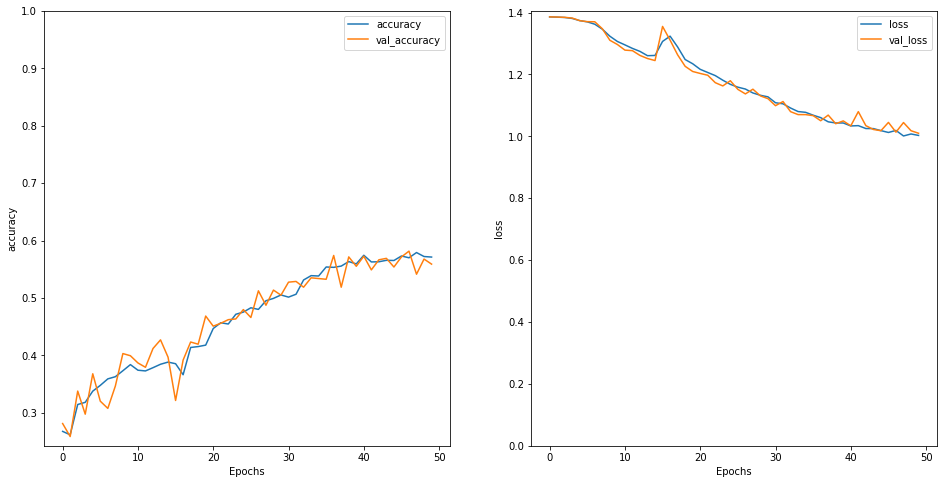

In [54]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [55]:
model.save("tf_models/rnn_easy_embed.h5")

### Hard Dataset (Distinct Job Categories)

In [56]:
is_working_with_easy_dataset = False

In [57]:
if is_working_with_easy_dataset:
    input_train_filename = "embedding_easy_train.csv"
    input_test_filename = "embedding_easy_test.csv"
else:
    input_train_filename = "embedding_difficult_train.csv"
    input_test_filename = "embedding_difficult_test.csv"

jd_train = pd.read_csv(input_train_filename, keep_default_na=False)
jd_test = pd.read_csv(input_test_filename, keep_default_na=False)

In [58]:
jd_train

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,software+engineer,-0.067028,-0.037456,0.040710,-0.022643,-0.065919,-0.011505,0.014374,0.070613,-0.072635,...,0.073042,-0.004869,-0.012730,-0.012608,0.025585,0.136745,0.038581,-0.099147,0.001722,0.032735
1,software+engineer,-0.049825,-0.026897,-0.014653,-0.045330,-0.002588,-0.085351,-0.020295,-0.026342,-0.046522,...,0.153783,0.060030,0.053321,-0.115148,0.043106,0.170601,-0.040410,-0.039290,0.035469,0.022973
2,software+engineer,-0.109452,-0.018895,-0.011882,-0.049141,-0.065425,-0.020879,0.020536,0.049572,-0.068171,...,0.067979,0.060650,0.008373,-0.073202,0.039430,0.084493,-0.058907,0.041129,-0.041035,-0.106831
3,ui+ux,-0.059268,0.002888,0.038257,0.000755,-0.040839,0.018103,0.136779,0.048689,-0.019846,...,-0.003655,0.047657,0.028251,-0.037878,0.034004,0.074488,0.008779,-0.027154,-0.012630,0.000571
4,ui+ux,-0.012034,0.015511,-0.003249,-0.078507,0.065040,-0.028536,-0.031559,0.013882,0.022090,...,0.019392,0.086536,-0.006240,0.011584,-0.047290,0.095525,-0.002575,-0.077631,-0.090518,0.043476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,software+engineer,-0.079604,0.007492,-0.051706,-0.099018,-0.030773,-0.024738,-0.015718,0.143318,0.023419,...,0.076493,0.073352,0.047936,-0.024901,0.018558,-0.000389,0.032267,-0.109857,0.065948,0.012895
3176,cyber+security,-0.037670,0.031925,-0.013679,-0.005070,0.021368,0.001775,0.096207,0.094450,-0.042398,...,0.044399,0.110647,0.002972,-0.029953,0.052398,0.080780,0.036664,-0.094719,-0.029790,-0.003033
3177,ui+ux,-0.025617,0.061029,-0.011124,-0.026316,-0.066101,-0.050747,-0.006923,0.085535,-0.037942,...,0.042129,0.081157,0.015721,-0.066116,0.042122,0.063814,0.002575,-0.027617,0.005385,0.017316
3178,data+analyst,-0.060959,-0.039796,-0.022763,-0.039479,-0.041932,-0.040012,0.063920,0.067434,0.023722,...,0.052077,0.101755,-0.004031,-0.010030,0.046817,0.042863,-0.059085,-0.064276,-0.031612,-0.012527


In [59]:
jd_test

,category,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,data+analyst,-0.067792,-0.039427,-0.044609,0.047954,-0.020255,0.046215,0.005775,0.025648,-0.049265,...,-0.005009,0.040230,-0.025145,0.057344,-0.027139,0.044581,0.021295,-0.058819,-0.034744,0.034043
1,cyber+security,-0.031839,-0.009482,-0.023652,-0.019206,0.044170,-0.014529,0.033187,0.019848,-0.066667,...,0.024783,0.006127,0.019935,-0.044377,0.023766,0.079525,0.047992,-0.133125,-0.075094,0.007815
2,software+engineer,0.000286,0.063366,0.006427,-0.068235,0.004449,-0.010305,0.060434,-0.016027,-0.025250,...,0.045451,0.042614,0.058757,-0.078012,0.074350,0.160043,0.063957,-0.004549,-0.031632,0.029312
3,ui+ux,-0.057650,0.055610,0.026229,-0.047242,-0.035953,-0.046720,0.011318,0.081929,-0.048681,...,0.061916,0.065591,0.013310,-0.060660,0.049816,0.041116,-0.045918,0.072459,0.037671,0.065580
4,ui+ux,-0.089035,-0.014104,-0.008340,-0.051578,0.020056,-0.007032,0.044202,0.059013,-0.116712,...,0.083643,0.001030,0.027071,-0.058678,0.040474,0.126645,0.022273,-0.124107,-0.037943,0.056573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,software+engineer,-0.022442,-0.005181,0.047044,0.003137,0.017104,-0.020445,0.032614,-0.009681,-0.021284,...,0.108325,0.032602,0.049168,-0.024625,-0.012232,0.204267,0.024259,-0.055909,-0.024037,0.020142
791,cyber+security,-0.055603,0.017493,-0.050230,0.006790,0.034947,-0.006445,0.067512,-0.005287,0.004463,...,0.098699,0.018417,0.038070,-0.059501,0.065384,0.033054,0.055798,-0.029429,0.001252,-0.026993
792,ui+ux,-0.015606,-0.037002,-0.006399,-0.027400,0.058740,0.011265,-0.012748,0.020038,-0.022678,...,-0.017598,0.006824,0.028923,0.071740,0.012084,0.054748,0.011543,-0.043361,-0.041390,-0.008505
793,ui+ux,-0.106446,-0.016218,0.035964,0.002867,0.038787,-0.028620,-0.006793,0.039116,-0.063164,...,0.030134,0.044736,0.027246,-0.002019,0.009813,0.096749,0.042344,-0.058779,-0.027651,0.083697


## Splitting Dataset into Features and Target Vectors

In [60]:
jd_train_X = jd_train.iloc[:, 1:]
jd_train_y = jd_train[["category"]]

jd_test_X = jd_test.iloc[:, 1:]
jd_test_y = jd_test[["category"]]

In [61]:
jd_test_y.value_counts()

category         
cyber+security       212
software+engineer    211
ui+ux                200
data+analyst         172
dtype: int64

### Encoding Target Variables

In [62]:
enc = OneHotEncoder(sparse=False)
enc.fit(jd_train_y);

In [63]:
jd_train_y = enc.transform(jd_train_y)
jd_test_y = enc.transform(jd_test_y)

### RNN Model creation and training

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(384, 1)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [65]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [66]:
history = model.fit(jd_train_X, jd_train_y, epochs=50, validation_steps=30, validation_data=(jd_test_X, jd_test_y))

Epoch 1/50


2023-04-03 23:44:35.774297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:44:36.023607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:44:36.023633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:44:37.399374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:44:37.413360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.3255 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - auc_4: 0.5177

2023-04-03 23:45:01.474923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:45:01.593524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-03 23:45:01.593559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 34s 278ms/step - loss: 1.3853 - accuracy: 0.3255 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - auc_4: 0.5177 - val_loss: 1.3844 - val_accuracy: 0.3597 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00 - val_auc_4: 0.6065
Epoch 2/50
100/100 [==============================] - 20s 204ms/step - loss: 1.3842 - accuracy: 0.4025 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - auc_4: 0.6017 - val_loss: 1.3832 - val_accuracy: 0.5157 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00 - val_auc_4: 0.6411
Epoch 3/50
100/100 [==============================] - 20s 204ms/step - loss: 1.3828 - accuracy: 0.4472 - recall_4: 0.0000e+00 - precision_4: 0.0000e+00 - auc_4: 0.6399 - val_loss: 1.3811 - val_accuracy: 0.4415 - val_recall_4: 0.0000e+00 - val_precision_4: 0.0000e+00 - val_auc_4: 0.6348
Epoch 4/50
100/100 [==============================] - 21s 208ms/step - loss: 1.3800 - accuracy: 0.4264 - recall_4: 0.0000e+00 - precision_4: 0.0000e+0

(0.0, 1.4145883649587632)

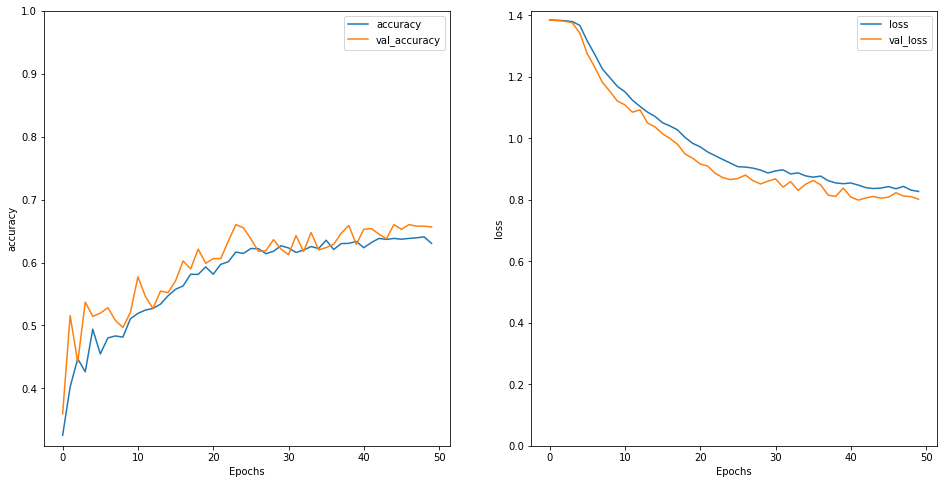

In [67]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

### Saving the model

In [68]:
model.save("tf_models/rnn_hard_embed.h5")